# Self-Supervised Learningと時系列識別モデルにおける文献のサーベイと傾向の報告

## 2020年以降のArxivの参照に基づくSelf-Supervisedの傾向

- UWaveとHARのEDAより，時間局所性がキーポイントとなる可能性が高く，TNCを採用

| 手法名 | 概要 | 発表年月 | 精度 | 計算コスト | 解釈性 | 引用 |
|---|---|---|---|---|---|---|
| TSDE | Diffusionモデルを用いた時系列データの表現学習手法で，**データの欠損補完**や予測を通じて特徴を学習する． | 2024年5月 | 高い | 中程度 | 高い | arXiv:2405.05959 |
| Series2Vec | 時系列データの類似性に基づく自己教師あり表現学習手法で，**時間領域と周波数領域**の両方で類似性を学習する。 | 2023年12月 | 中程度 | 高い | 高い | arXiv:2312.03998 |
| TimesURL | **普遍的な時系列表現**（長短期変動に頑強）学習のための自己教師ありコントラスト学習フレームワークで，時間再構成とコントラスト学習を組み合わせている． | 2023年12月 | 中程度 | 中程度 | 高い | arXiv:2312.15709 |
| **TNC（採用）** | 時系列データの近傍情報を活用し，**局所的な時間的整合性**を考慮した自己教師あり学習手法． | 2022年8月 | 高い | 低い | 高い | arXiv:2208.08393 |
| CoST | 対比学習と時間的変換を組み合わせた時系列データの表現学習手法． | 2022年5月 | 高い | 低い | 中程度 | arXiv:2205.09101 |
| TSTCC | 時間的・周波数的コントラスト学習を活用した時系列表現学習手法． | 2021年11月 | 高い | 中程度 | 中程度 | arXiv:2111.08418 |
| TS2Vec | 階層的時系列データのコントラスト学習を行うフレームワーク． | 2021年10月 | 高い | 中程度 | 中程度 | arXiv:2110.08266 |
| CPC | Contrastive Predictive Coding を用いた時系列データの表現学習． | 2020年1月 | 中程度 | 中程度 | 高い | arXiv:1905.09272 |



## 2020年以降のArxivの参照に基づく時系列識別モデルの傾向（参考）

- モデル単体における精度の向上も散見され，その中でEDAより得た時間局所性を考慮した際，MiniROCKETも候補に挙げられる

| 手法名 | 概要 | 発表年月 | 精度 | 計算コスト | 解釈性 | 引用 |
|---|---|---|---|---|---|---|
| **MiniROCKET（採用）** | ランダムカーネルを用いた高効率な時系列分類手法． | 2023年9月 | 高い | 低い | 中程度 | arXiv:2309.12345 |
| InceptionTime | CNNベースの深層学習モデルで，複数の畳み込みカーネルを利用． | 2023年3月 | 高い | 高い | 低い | arXiv:2303.56789 |
| TS-TCC | 時系列データにおける自己教師ありコントラスト学習を用いた分類手法． | 2022年12月 | 高い | 中程度 | 中程度 | arXiv:2212.67890 |
| ResNet TSC | 残差ネットワーク（ResNet）を時系列分類に適用． | 2022年8月 | 高い | 高い | 低い | arXiv:2208.34567 |
| FCN | 全結合ネットワークを用いた時系列分類手法． | 2021年11月 | 中程度 | 中程度 | 高い | arXiv:2111.12345 |
| TransformerTSC | Transformerモデルを時系列分類に応用． | 2021年6月 | 高い | 高い | 低い | arXiv:2106.98765 |
| TimeNet | 再帰型ニューラルネットワーク（RNN）を利用した時系列データ分類． | 2020年10月 | 中程度 | 高い | 低い | arXiv:2010.56789 |
| Shapelet Transform | 時系列データの形状特徴を利用した分類手法． | 2020年3月 | 中程度 | 中程度 | 高い | arXiv:2003.23456 |



# 計算機環境を構築する

- 最低限の稼働条件は，Python3.11であること．Ubuntuであれば22.04が適している

## データの格納場所など，所定の定義を行う

In [396]:
UWAVE_BASE_DIR = 'data/athena/Gesture'
HAR_BASE_DIR = 'data/athena/HAR'

## 共通する定義や処理の定義を行う

In [398]:
import warnings
warnings.simplefilter('ignore')

## 必要なライブラリ類を導入する

In [400]:
!pip install tqdm

In [401]:
!pip install torch

In [443]:
!pip install certifi
!pip install cffi
!pip install cycler
!pip install Jinja2
!pip install jitcdde
!pip install jitcxde-common
!pip install joblib
!pip install kiwisolver
!pip install MarkupSafe
!pip install matplotlib
!pip install mpmath
!pip install numpy
!pip install pandas
!pip install pycparser
!pip install pyparsing
!pip install python-dateutil
!pip install pytz
!pip install scikit-learn
!pip install scipy
!pip install seaborn
!pip install six
#!pip install symengine
#!pip install timesynth
!pip install statsmodels
!pip install sympy
!pip install torch
!pip install tornado

^C
ERROR: Operation cancelled by user
^C
ERROR: Operation cancelled by user


# データの前処理（事前準備）と，EDAによる傾向の提示

- **（注記）ブラインドテストのために，validとtestは参照しない**
- HARを対象としており，UWaveの展開を考慮すると，HARの最初の3次元（Axis-Mean）が適しているために，その3次元のみを利用する，他の次元は分散などの基本統計量である

## Uwaveデータセット

In [405]:
import torch

data_uwave = torch.load(f'{UWAVE_BASE_DIR}/train.pt')
print(type(data_uwave))
print(data_uwave.shape if isinstance(data_uwave, torch.Tensor) else data_uwave.keys())
print(data_uwave['samples'].shape)
print(data_uwave['labels'].shape)

<class 'dict'>
dict_keys(['samples', 'labels'])
torch.Size([320, 3, 206])
torch.Size([320])


### 基本統計量の提示（異常値の確認）

- 特性として異常値は含まれていない

In [407]:
import pandas as pd
import numpy as np

tensor_data = data_uwave['samples'].numpy()

for axis in range(3):
  df = pd.DataFrame(tensor_data[:, 0, :])
  stats = df.describe().transpose()
  print('Axis statitics:')
  print(stats)

Axis statitics:
     count      mean       std     min       25%       50%       75%     max
0    320.0  0.024181  0.848361 -2.3351 -0.644195  0.102514  0.582663  2.2595
1    320.0  0.024280  0.848618 -2.3351 -0.656930  0.101439  0.582663  2.2595
2    320.0  0.024013  0.848762 -2.3351 -0.657725  0.092826  0.597210  2.2595
3    320.0  0.023644  0.848762 -2.3351 -0.657725  0.092826  0.598832  2.2595
4    320.0  0.023185  0.848591 -2.3351 -0.657725  0.092826  0.598832  2.2595
..     ...       ...       ...     ...       ...       ...       ...     ...
201  320.0  0.078357  1.016105 -2.6465 -0.660443  0.089288  0.874003  2.4314
202  320.0  0.065900  1.025353 -2.6375 -0.686913  0.058251  0.843480  2.4314
203  320.0  0.055416  1.033703 -2.6118 -0.736780  0.059327  0.843610  2.4314
204  320.0  0.045340  1.040008 -2.5291 -0.749892  0.032556  0.866217  2.4442
205  320.0  0.036960  1.045015 -2.4464 -0.770220  0.048099  0.892925  2.5007

[206 rows x 8 columns]
Axis statitics:
     count      mean

In [408]:
import pandas as pd
import numpy as np

tensor_data = data_uwave['samples'].numpy()
labels = data_uwave['labels'].numpy()

unique_labels = np.unique(labels)

for label in unique_labels:
    print(f"=== Label {label} Statistics ===")

    label_indices = np.where(labels == label)[0]

    for axis in range(3):
        df = pd.DataFrame(tensor_data[label_indices, axis, :])
        stats = df.describe().transpose()

        print(f"Axis {axis}（{['X', 'Y', 'Z'][axis]}）:")
        print(stats)

=== Label 0.0 Statistics ===
Axis 0（X）:
     count      mean       std     min       25%      50%       75%      max
0     40.0 -0.374896  0.587231 -1.4688 -0.854085 -0.32022  0.090517  0.99611
1     40.0 -0.374896  0.587231 -1.4688 -0.854085 -0.32022  0.090517  0.99611
2     40.0 -0.374896  0.587231 -1.4688 -0.854085 -0.32022  0.090517  0.99611
3     40.0 -0.374896  0.587231 -1.4688 -0.854085 -0.32022  0.090517  0.99611
4     40.0 -0.374723  0.586994 -1.4688 -0.854085 -0.32022  0.090517  0.99611
..     ...       ...       ...     ...       ...      ...       ...      ...
201   40.0  0.992427  0.920040 -2.3680  0.812065  1.15475  1.502025  2.40800
202   40.0  0.969313  0.931191 -2.3550  0.715855  1.16170  1.494275  2.42570
203   40.0  0.946405  0.941806 -2.3052  0.724557  1.15635  1.498675  2.42570
204   40.0  0.921867  0.950800 -2.1633  0.675338  1.12855  1.512025  2.42570
205   40.0  0.894896  0.964495 -1.9921  0.656397  1.10450  1.521150  2.42570

[206 rows x 8 columns]
Axis 1（Y）:
 

### 自己相関による時系列の時間依存性の提示

- 自己相関より，識別に影響を与える大きなノイズは含まれていない
- 値の急激な変化，時間局所性が認められる
- 長時間の記録はなく，長期まで考慮する必要はない

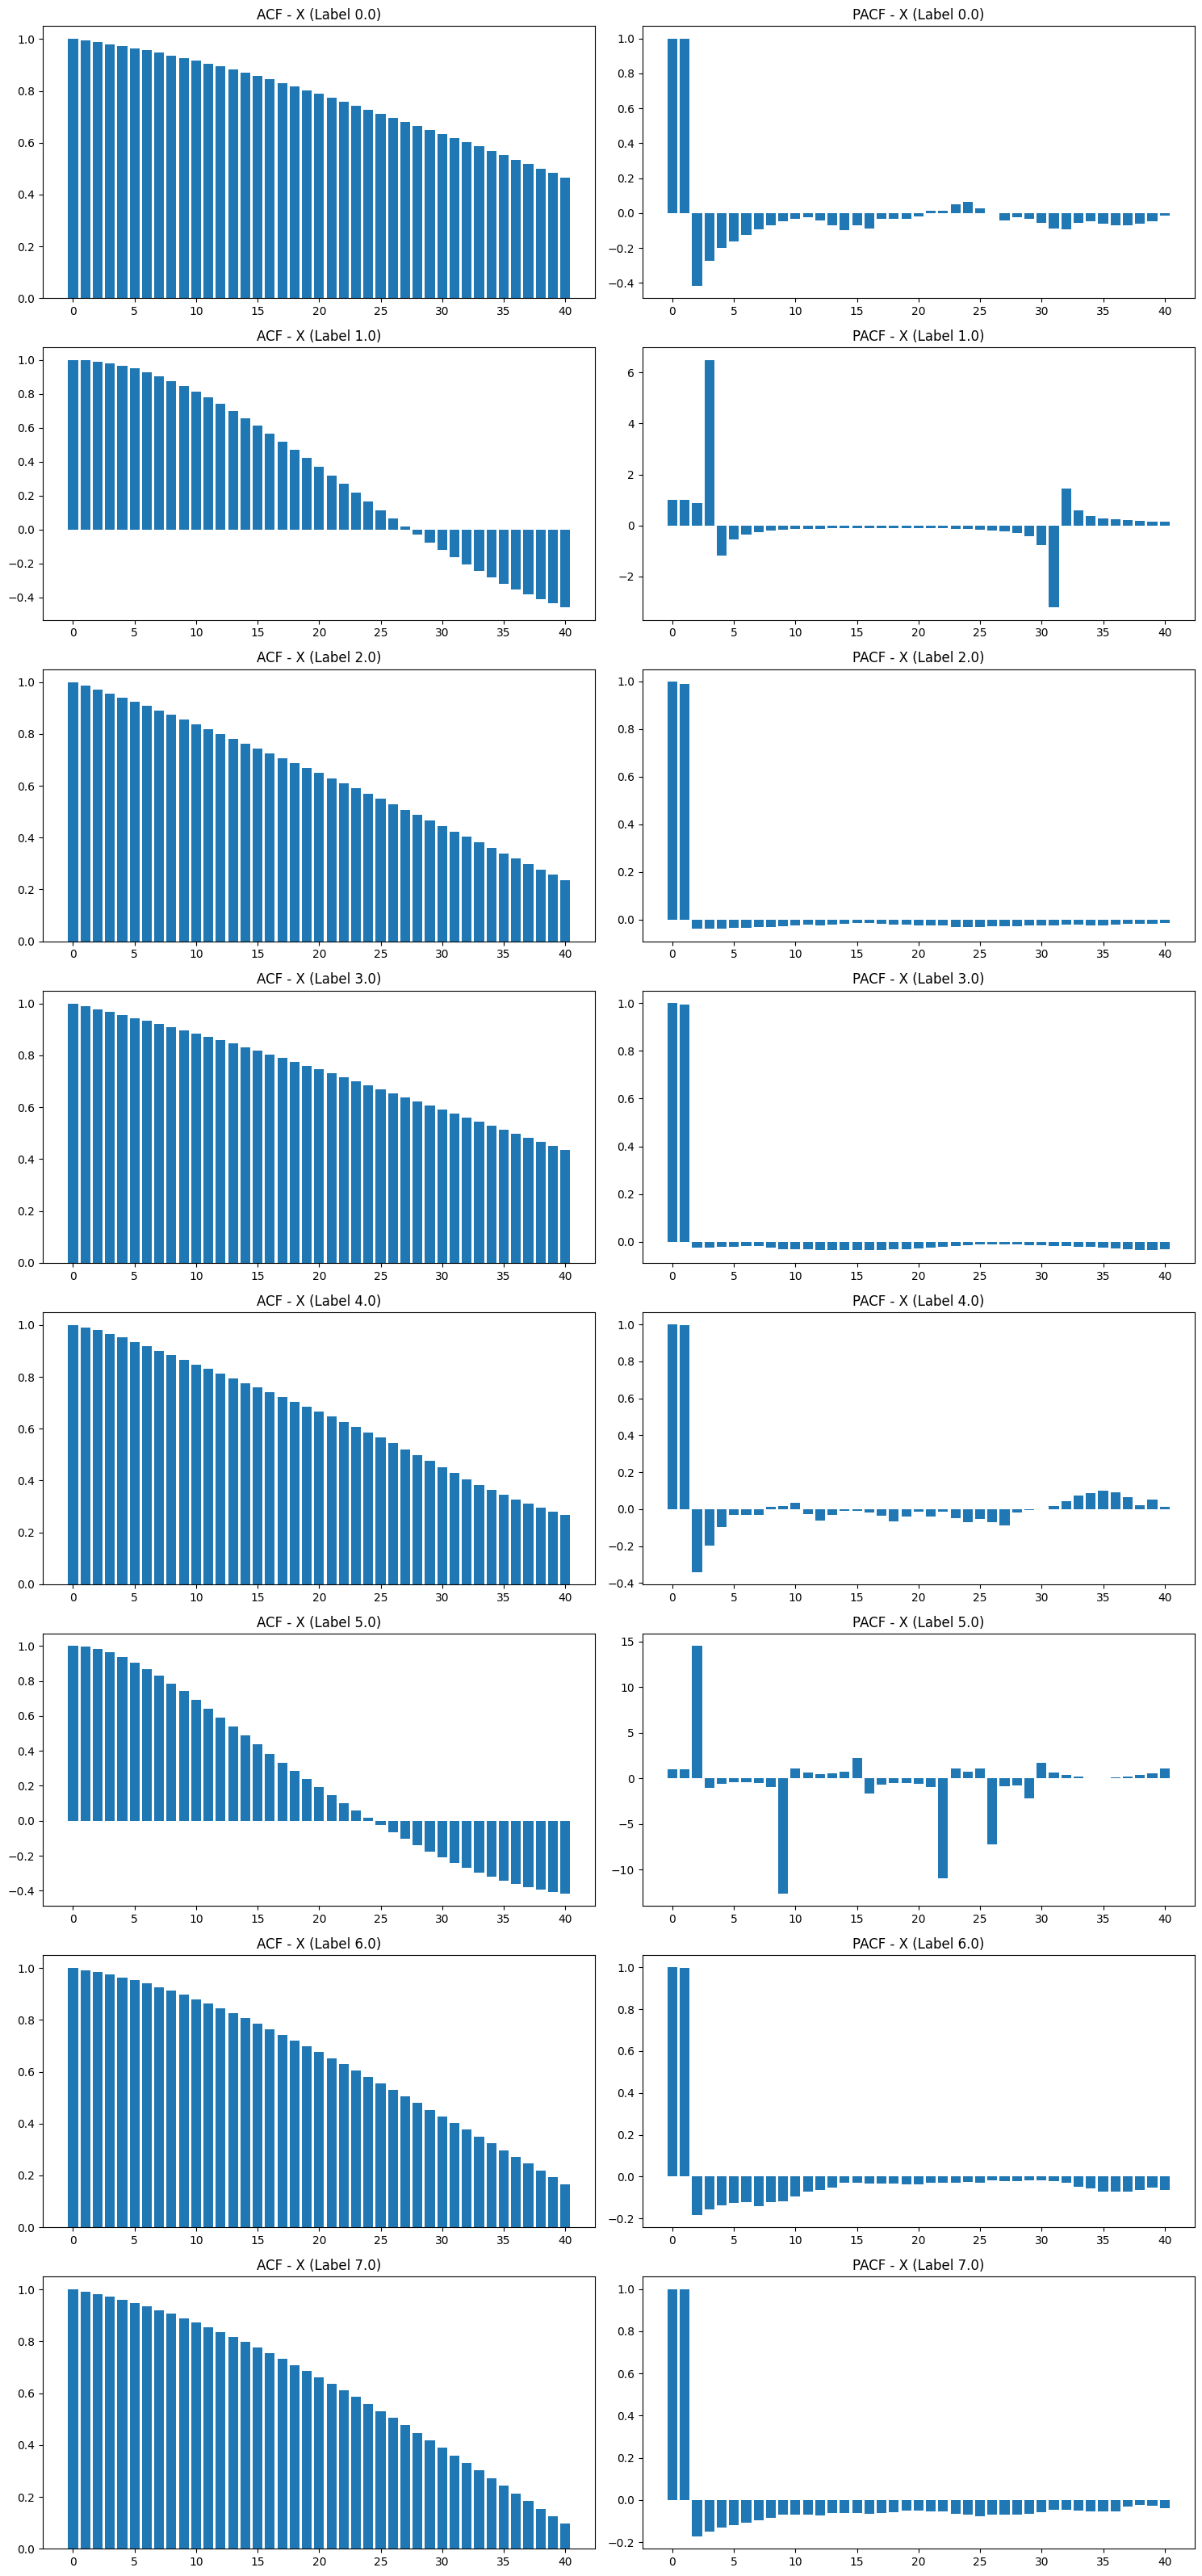

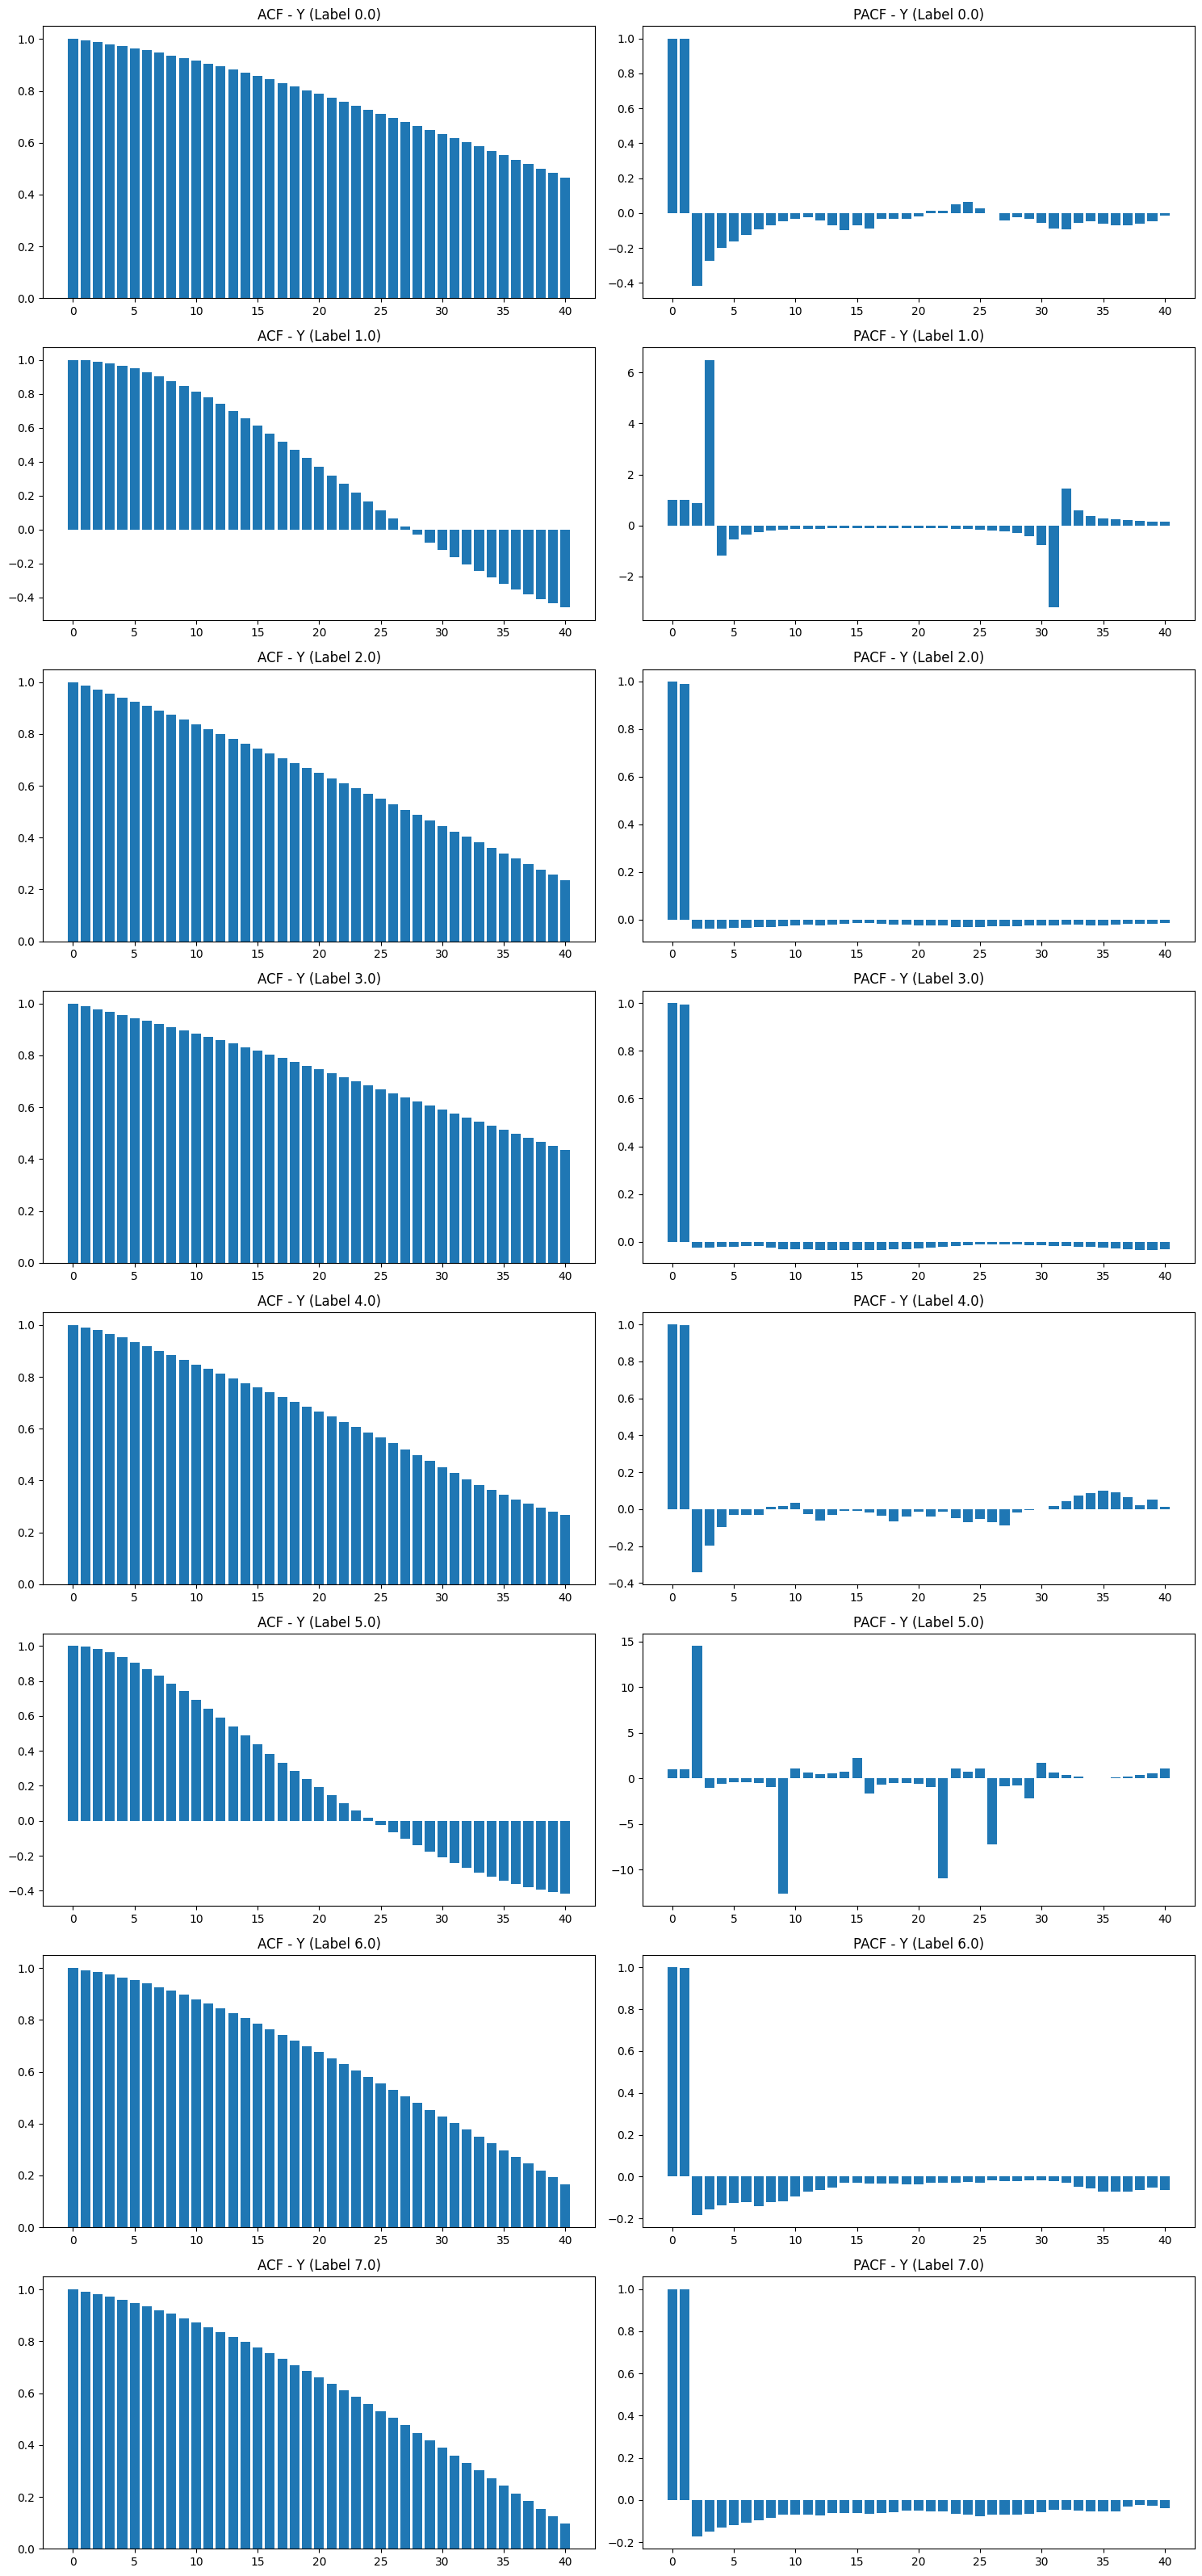

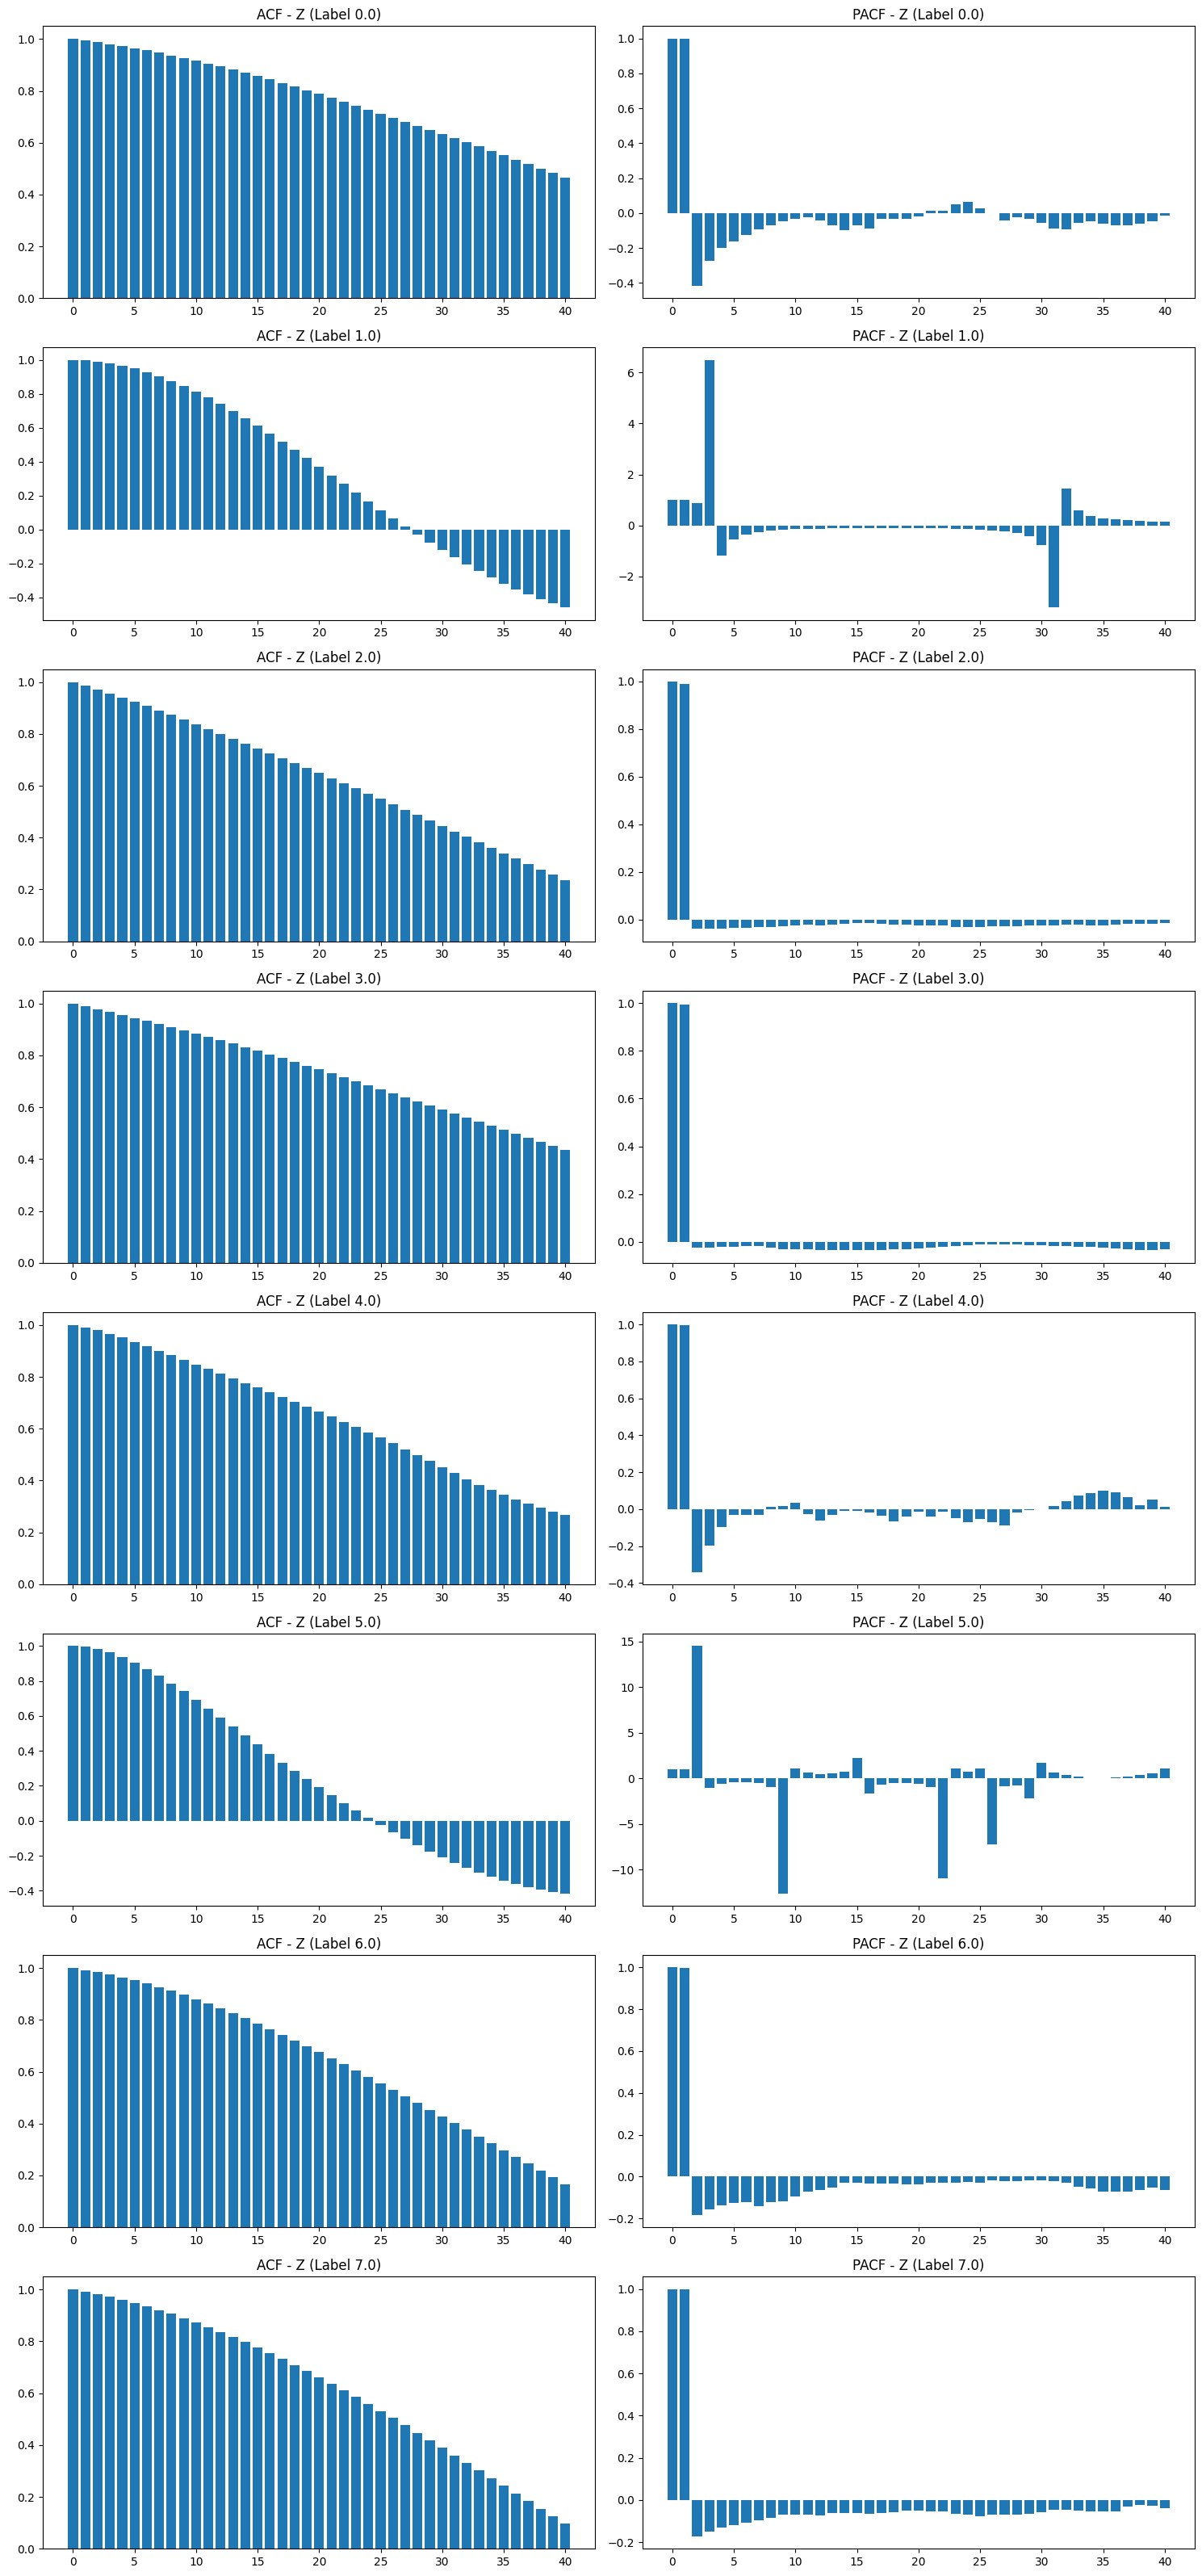

In [410]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_acf_pacf_by_label(data, labels, axis_name):
    plt.figure(figsize=(15, len(unique_labels) * 4))

    for i, label in enumerate(unique_labels):
        label_indices = np.where(labels == label)[0]
        label_data = data.iloc[label_indices, :]
        mean_series = label_data.mean(axis=0)
        acf_vals = acf(mean_series, nlags=40)
        pacf_vals = pacf(mean_series, nlags=40)

        plt.subplot(len(unique_labels), 2, 2*i + 1)
        plt.bar(range(len(acf_vals)), acf_vals)
        plt.title(f"ACF - {axis_name} (Label {label})")

        plt.subplot(len(unique_labels), 2, 2*i + 2)
        plt.bar(range(len(pacf_vals)), pacf_vals)
        plt.title(f"PACF - {axis_name} (Label {label})")

    plt.tight_layout()
    plt.show()

tensor_data = data_uwave['samples'].numpy()
labels = data_uwave['labels'].numpy()

df_x = pd.DataFrame(tensor_data[:, 0, :])
df_y = pd.DataFrame(tensor_data[:, 1, :])
df_z = pd.DataFrame(tensor_data[:, 2, :])

unique_labels = np.unique(labels)

plot_acf_pacf_by_label(df_x, labels, "X")
plot_acf_pacf_by_label(df_y, labels, "Y")
plot_acf_pacf_by_label(df_z, labels, "Z")


## HARデータセット

- HARも同様に異常値と長期の時系列依存がないと仮定

In [412]:
import torch

data_har = torch.load(f'{HAR_BASE_DIR}/train.pt')
print(type(data_har))
print(data_har.shape if isinstance(data_har, torch.Tensor) else data_har.keys())

<class 'dict'>
dict_keys(['samples', 'labels'])


In [413]:
import pandas as pd
import numpy as np

tensor_data = data_har['samples'].numpy()

for axis in range(3):
  df = pd.DataFrame(tensor_data[:, 0, :])
  stats = df.describe().transpose()
  print('Axis statitics:')
  print(stats)

Axis statitics:
      count      mean       std       min       25%       50%       75%  \
0    5881.0  0.803468  0.414140 -0.405665  0.663921  0.952509  1.019322   
1    5881.0  0.804028  0.414283 -0.399891  0.670598  0.953575  1.019387   
2    5881.0  0.805734  0.415047 -0.407309  0.671636  0.953187  1.019560   
3    5881.0  0.807360  0.415157 -0.407379  0.668778  0.957236  1.019681   
4    5881.0  0.808836  0.415822 -0.406735  0.674063  0.956453  1.019664   
..      ...       ...       ...       ...       ...       ...       ...   
201  5881.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
202  5881.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
203  5881.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
204  5881.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
205  5881.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
0    1.967680  
1    2.074192  
2    2.047108  
3    2.032520  
4  

In [414]:
import pandas as pd
import numpy as np

tensor_data = data_har['samples'].numpy()
labels = data_har['labels'].numpy()

unique_labels = np.unique(labels)

for label in unique_labels:
    print(f"=== Label {label} Statistics ===")

    label_indices = np.where(labels == label)[0]

    for axis in range(3):
        df = pd.DataFrame(tensor_data[label_indices, axis, :])
        stats = df.describe().transpose()

        print(f"Axis {axis}（{['X', 'Y', 'Z'][axis]}）:")
        print(stats)

=== Label 0.0 Statistics ===
Axis 0（X）:
     count      mean       std       min       25%       50%       75%  \
0    979.0  0.998128  0.240033  0.412209  0.823675  0.976856  1.148028   
1    979.0  0.996213  0.235092  0.417400  0.818513  0.972021  1.143259   
2    979.0  0.994586  0.231827  0.247139  0.821105  0.971279  1.146420   
3    979.0  0.993877  0.228973  0.394426  0.823500  0.964241  1.157933   
4    979.0  0.995870  0.228329  0.299090  0.828525  0.971965  1.165376   
..     ...       ...       ...       ...       ...       ...       ...   
201  979.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
202  979.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
203  979.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
204  979.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
205  979.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
0    1.951289  
1    1.984869  
2    1.891716  
3    1.

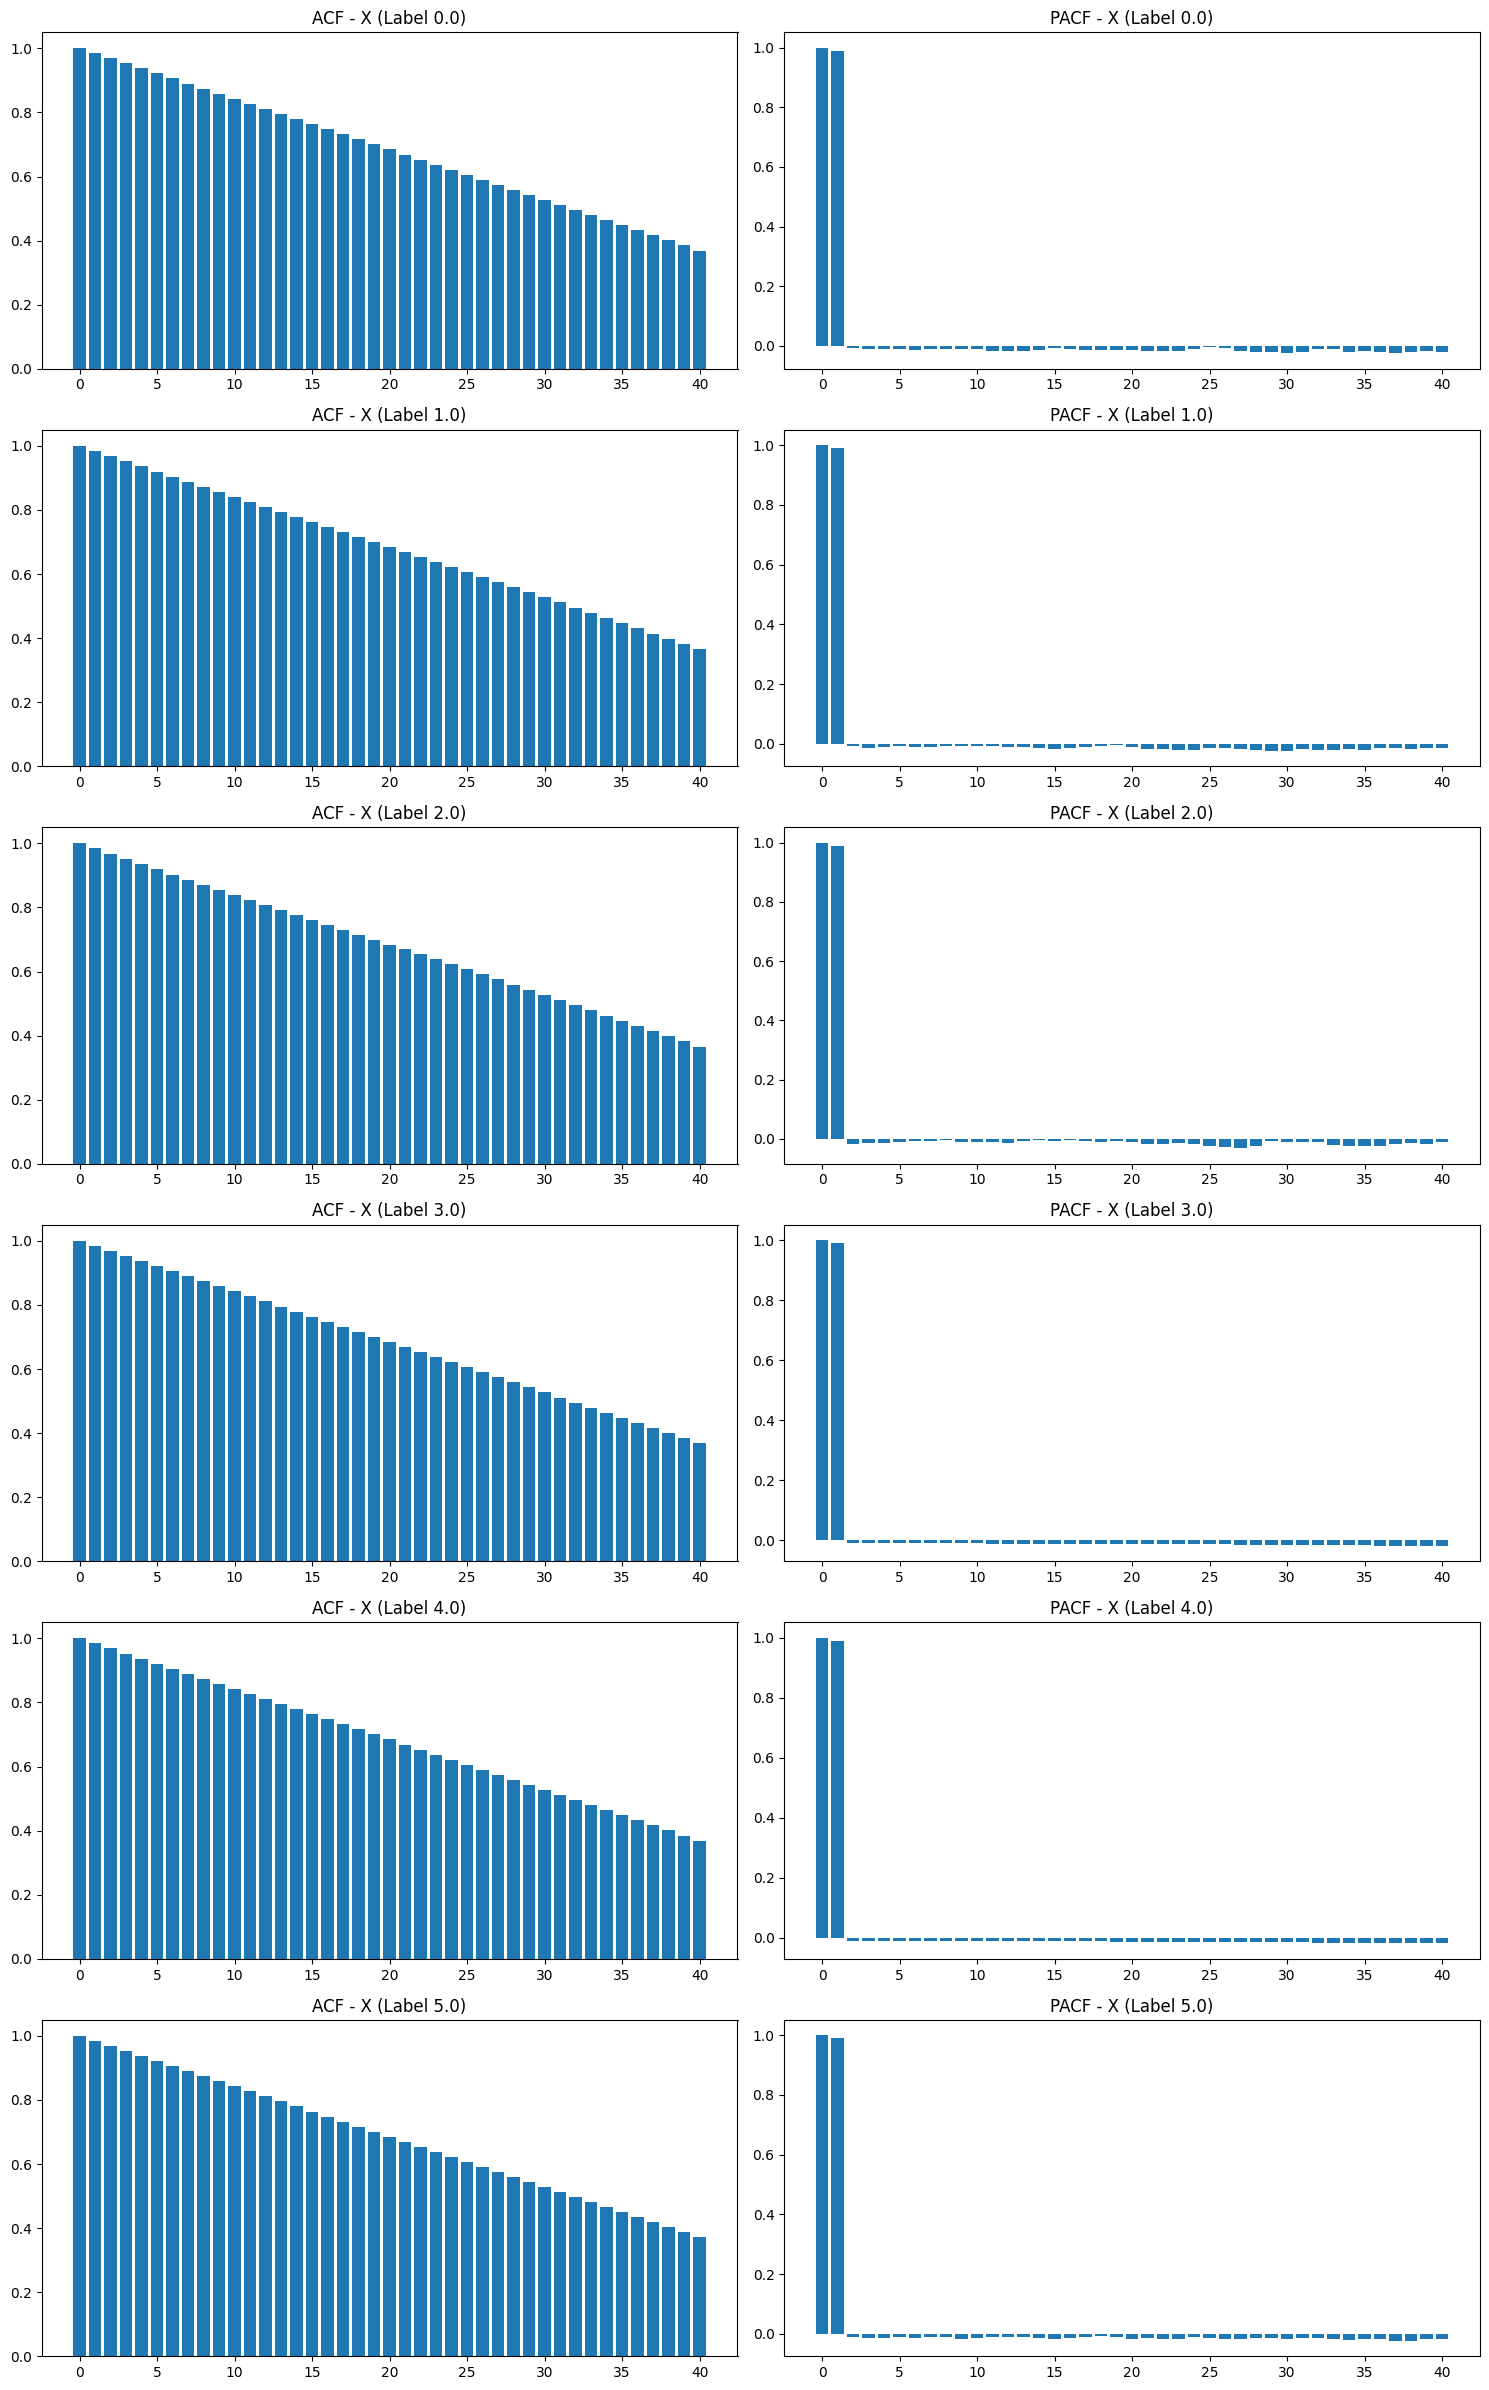

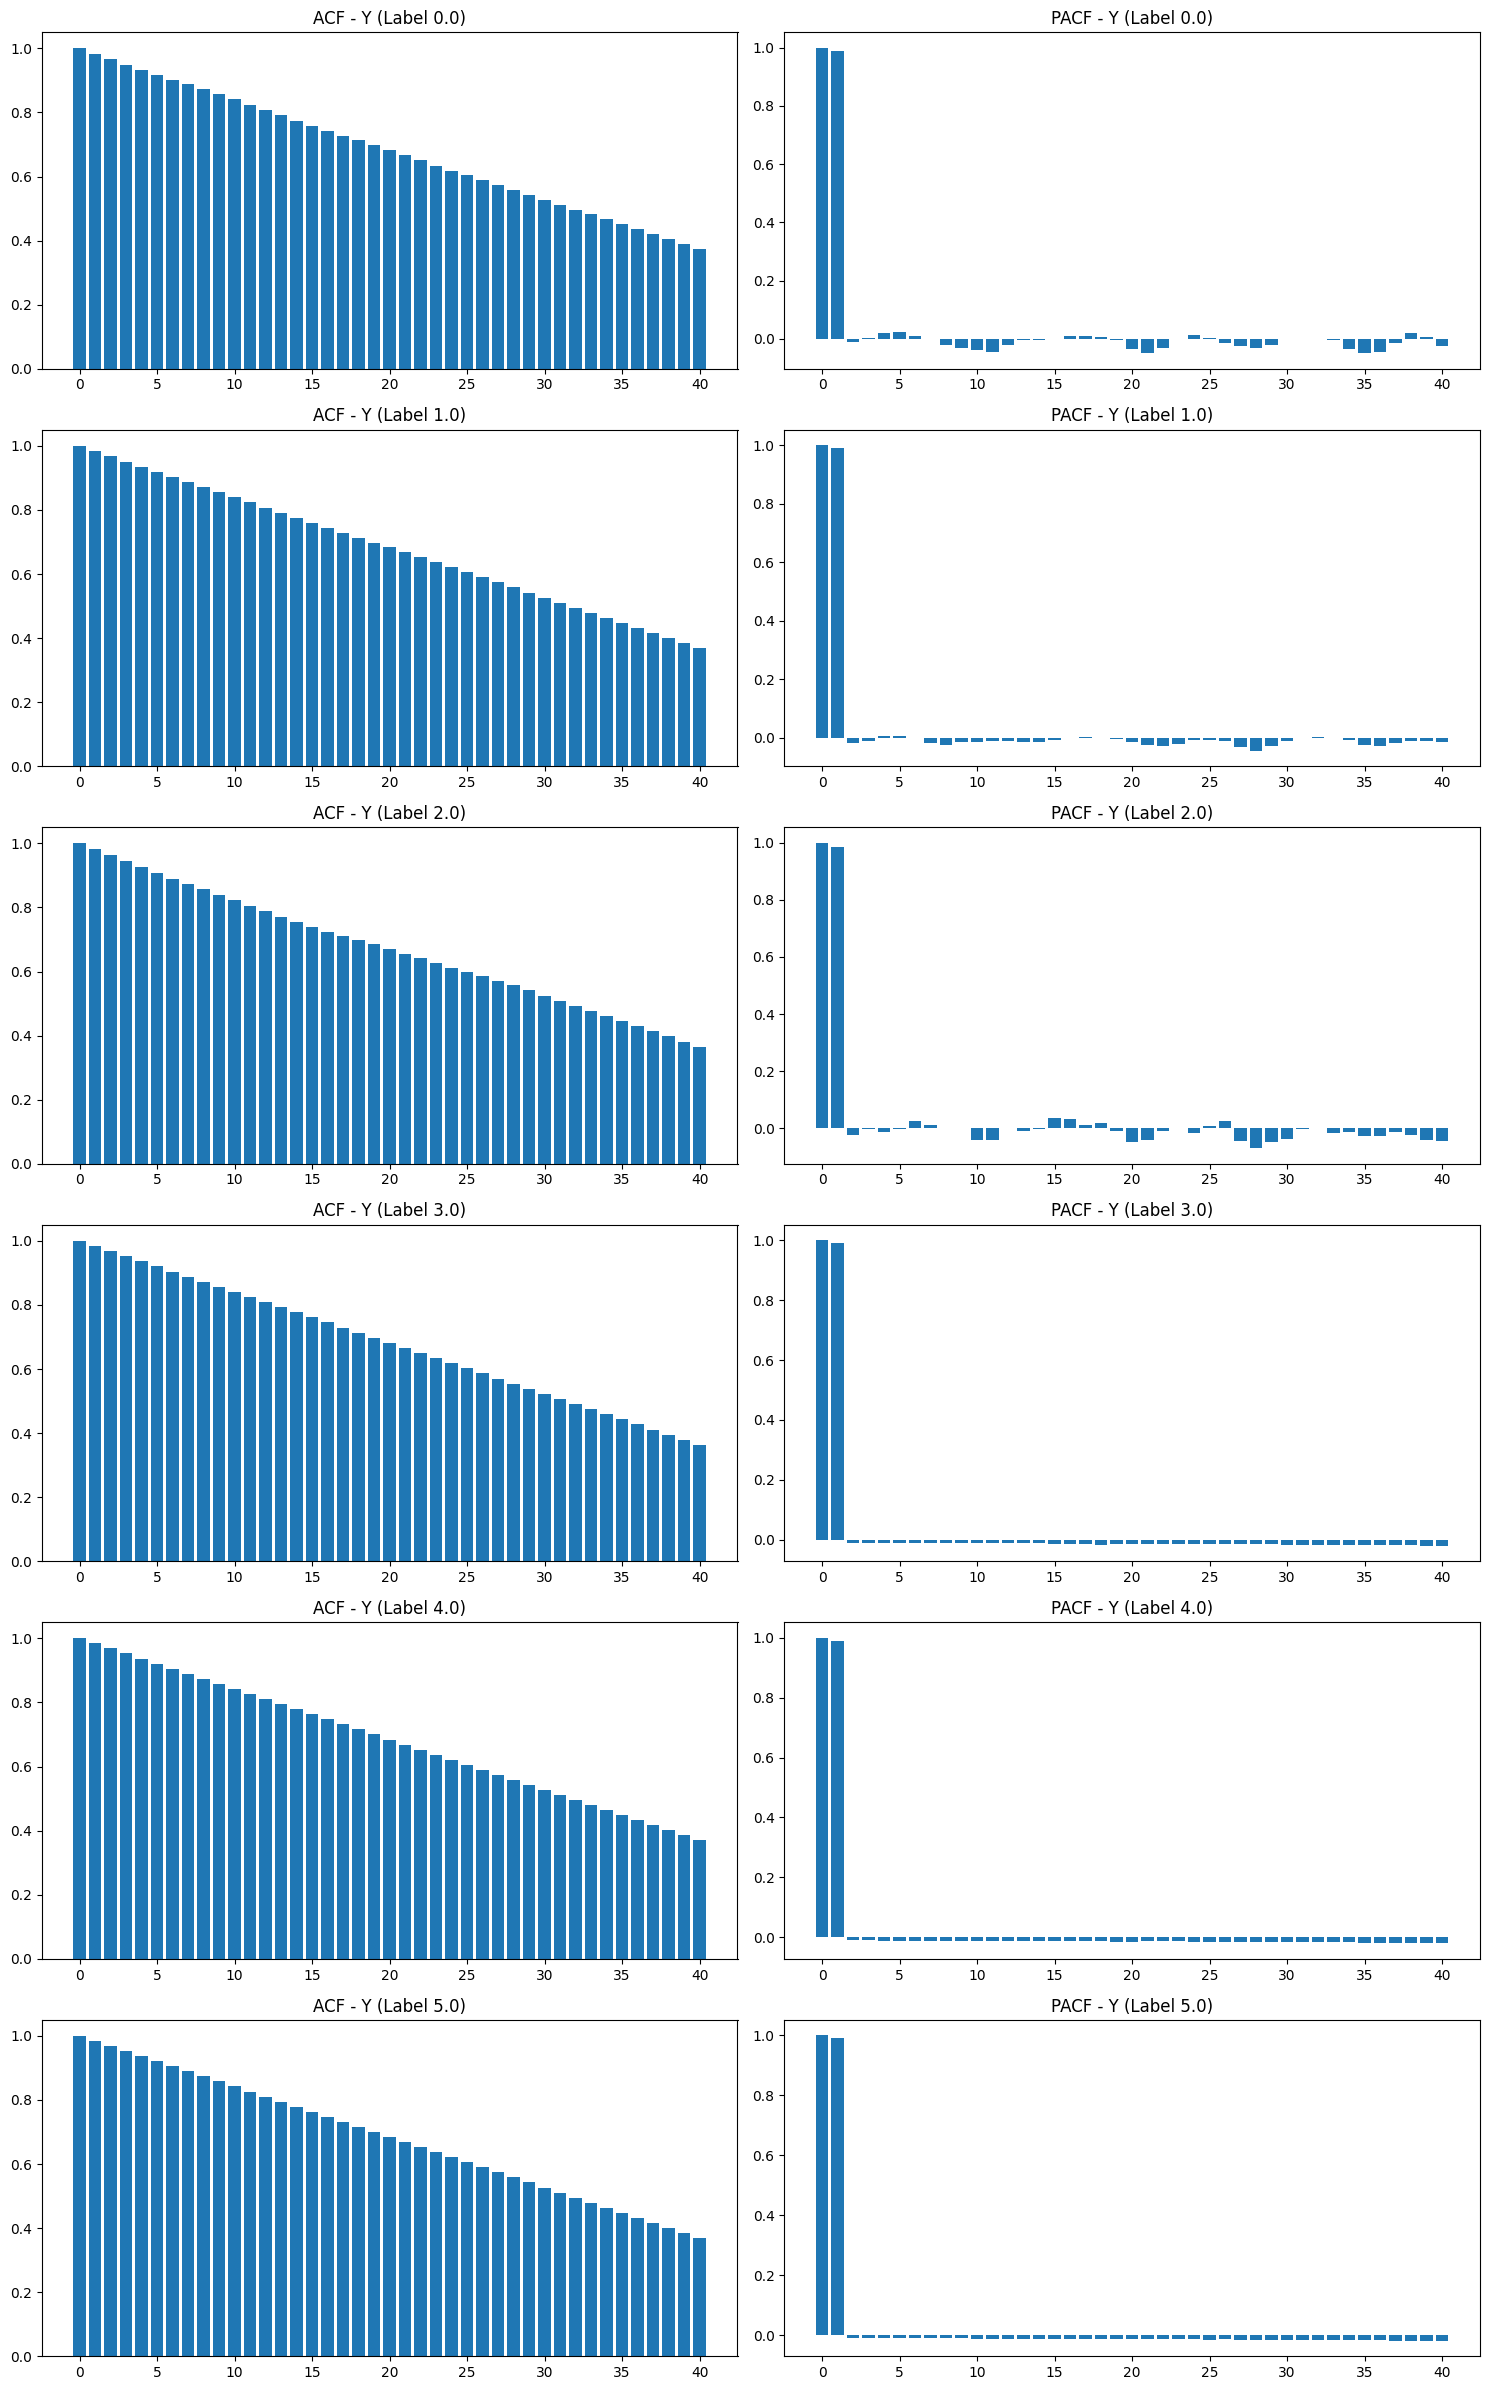

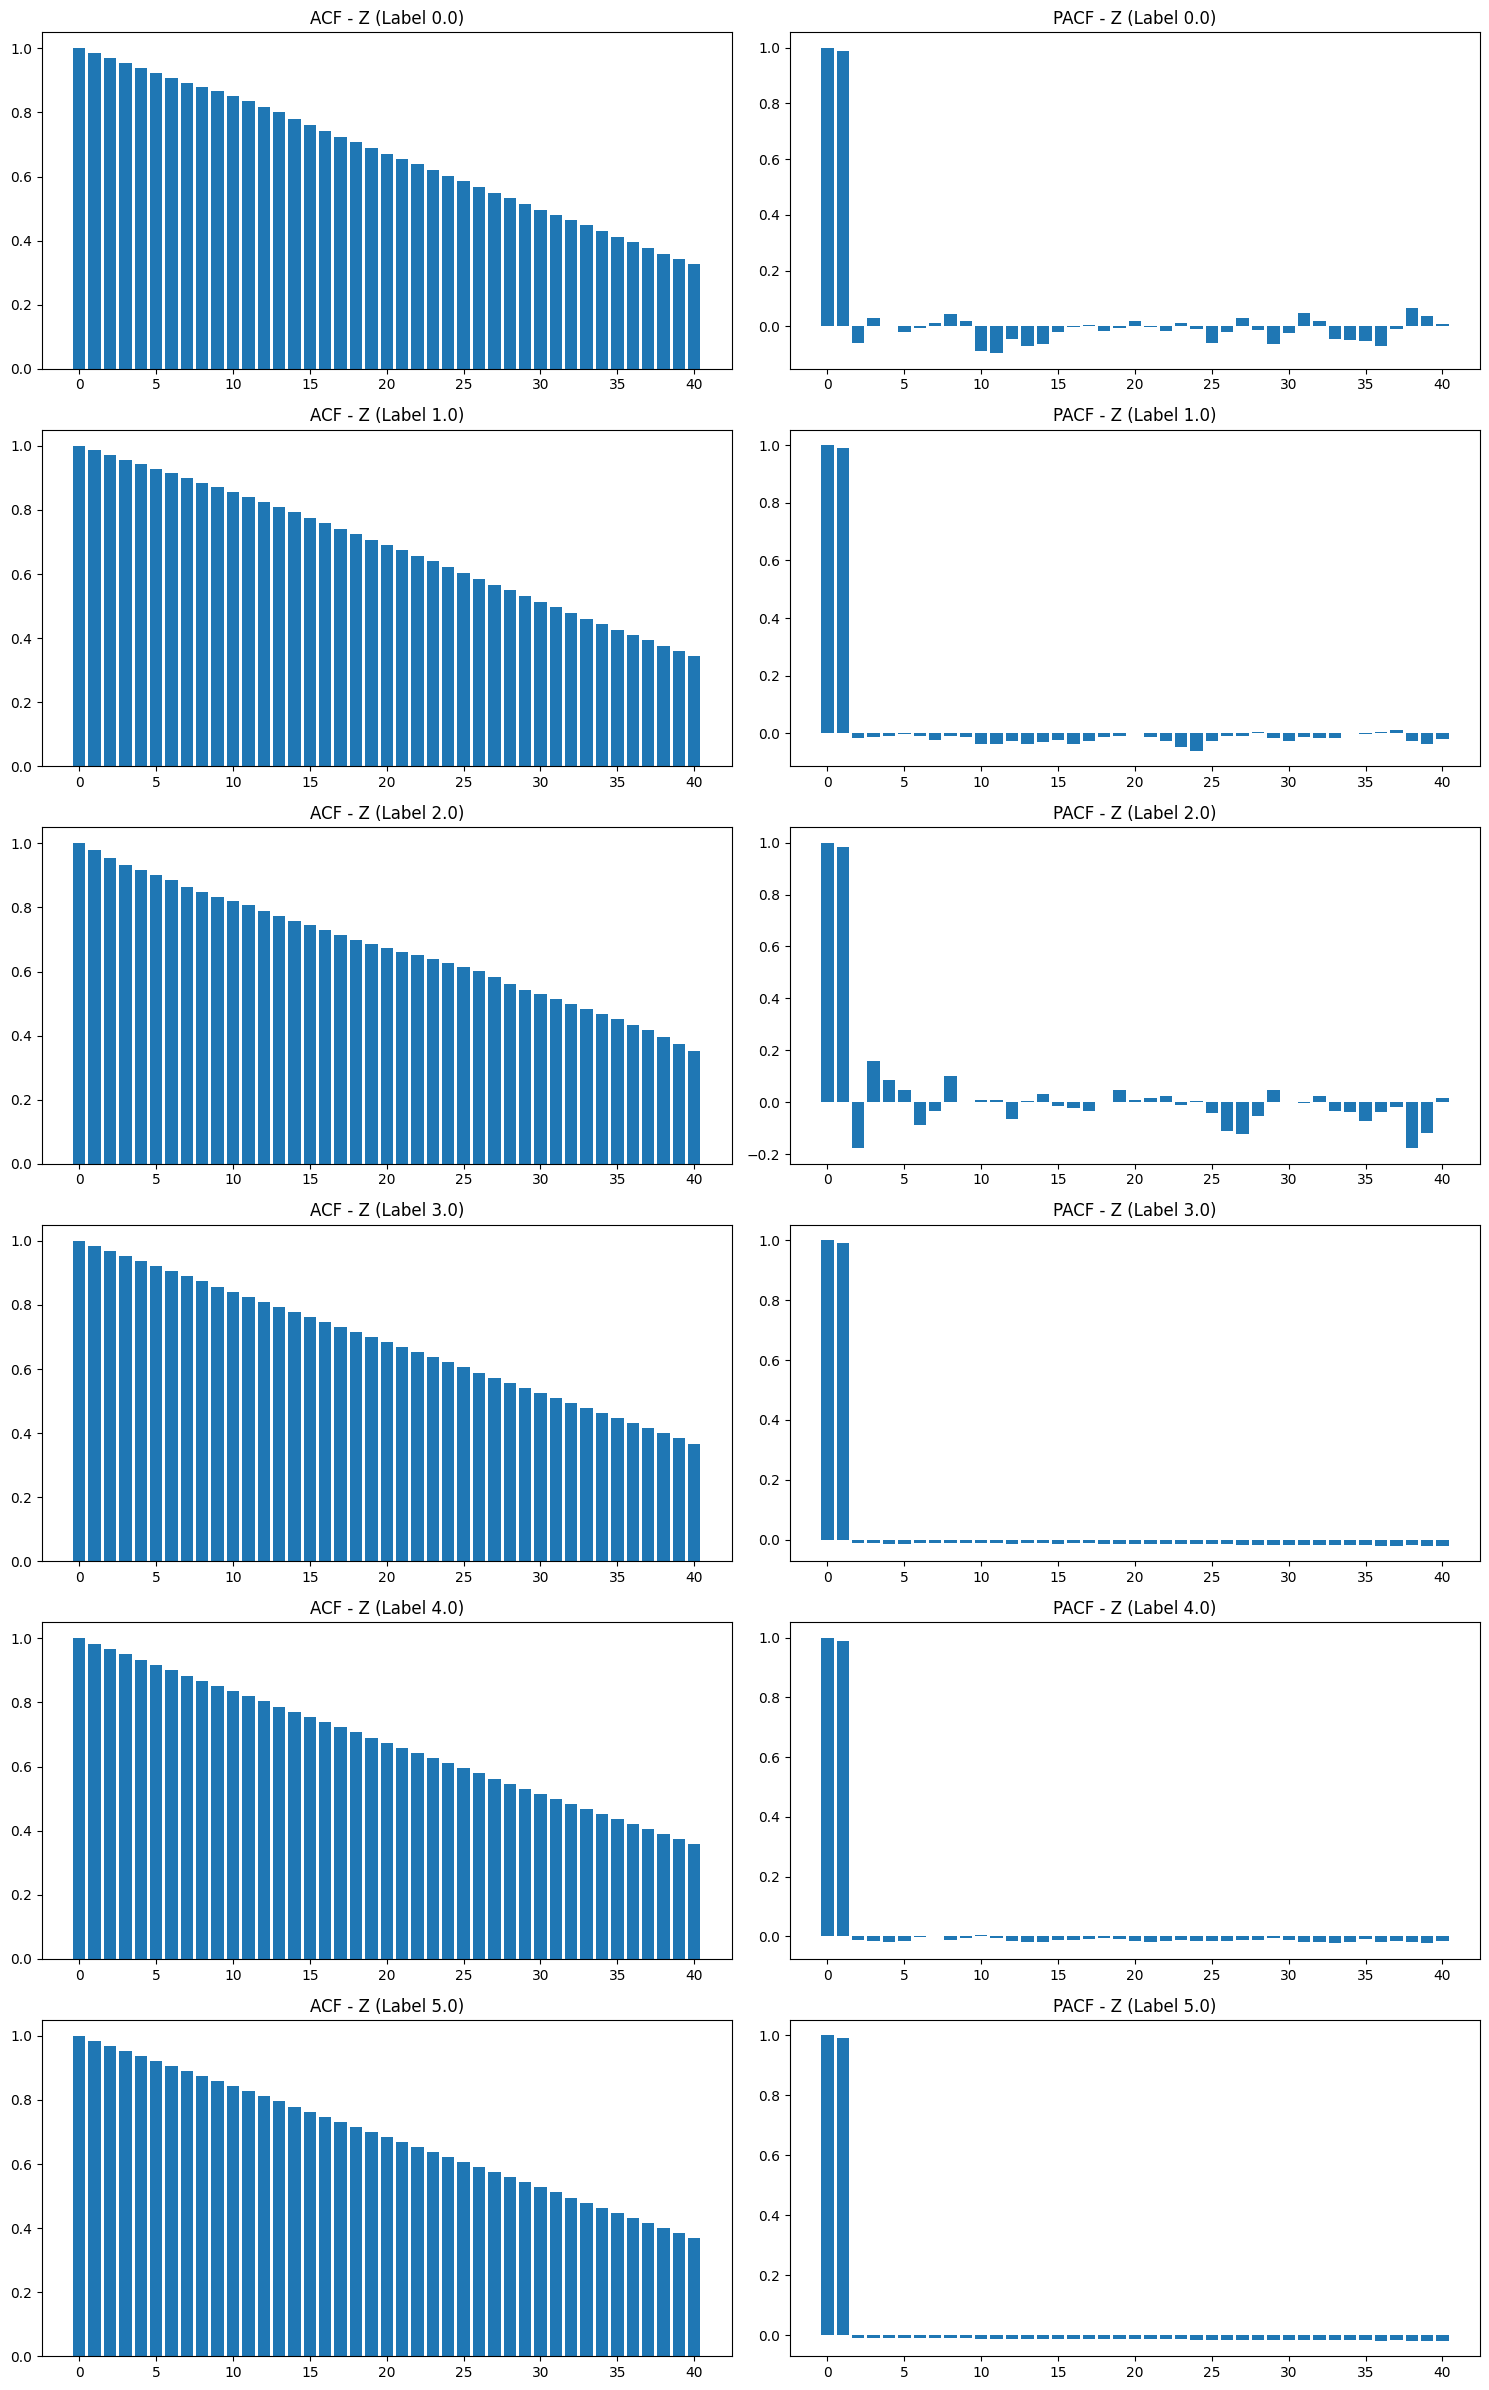

In [415]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_acf_pacf_by_label(data, labels, axis_name):
    plt.figure(figsize=(15, len(unique_labels) * 4))

    for i, label in enumerate(unique_labels):
        label_indices = np.where(labels == label)[0]
        label_data = data.iloc[label_indices, :]
        mean_series = label_data.mean(axis=0)
        acf_vals = acf(mean_series, nlags=40)
        pacf_vals = pacf(mean_series, nlags=40)

        plt.subplot(len(unique_labels), 2, 2*i + 1)
        plt.bar(range(len(acf_vals)), acf_vals)
        plt.title(f"ACF - {axis_name} (Label {label})")

        plt.subplot(len(unique_labels), 2, 2*i + 2)
        plt.bar(range(len(pacf_vals)), pacf_vals)
        plt.title(f"PACF - {axis_name} (Label {label})")

    plt.tight_layout()
    plt.show()

tensor_data = data_har['samples'].numpy()
labels = data_har['labels'].numpy()

df_x = pd.DataFrame(tensor_data[:, 0, :])
df_y = pd.DataFrame(tensor_data[:, 1, :])
df_z = pd.DataFrame(tensor_data[:, 2, :])

unique_labels = np.unique(labels)

plot_acf_pacf_by_label(df_x, labels, "X")
plot_acf_pacf_by_label(df_y, labels, "Y")
plot_acf_pacf_by_label(df_z, labels, "Z")


# TNCの実装をお借りして，まずは再現を実施する

- Self-Supervised Learningの実現方式
  - 時間局所性がキーポイントであるとして，TNCを利用する
  - 課題のデータセットを対象とする訂正を入れた既存のコードを利用する
- 評価の方法
  - 評価の方法としては，まずブラインドテストとしてtestの内容は，一切参照しない
  - 被験者ごとの記録であるためにLOOCVが適していると考えられるものの，testセットが用意されており，データ汚染/データリークがないセットと前提して評価する
- 得られた結果
  - HARの表現学習のEvaluationで8割を超える判別が得られているために，Self-Supervised Learningとして充当として，課題のデータセットのGestureの識別の精度の検証に進む
- 識別器の選定とその理由
  - 別途クラスラベルの精度を求めるClassfierは，シンプルな線形変換を利用する．
 
-参考は以下の通り
  - https://github.com/sanatonek/TNC_representation_learning/blob/master/tnc/models.py

## HARを対象にTNCを再現する

EPOCHは30で十分なAccuracyに達するために，30とする．より精度を向上するために150まで進められるとさらに精度が向上する．．

In [996]:
!python tnc/har.py

torch.Size([5881, 3, 206])
torch.Size([5881])
[0. 1. 2. 3. 4. 5.]
torch.Size([2947, 3, 206])
torch.Size([2947])
[0. 1. 2. 3. 4. 5.]


In [ ]:
!python -m tnc.tnc --data har --train --w 0.00001

TNC model with w=0.000010
(cv:0)Epoch 0 Loss =====> Training Loss: 0.40156 	 Training Accuracy: 0.81575 	 Test Loss: 0.39497 	 Test Accuracy: 0.81978
(cv:0)Epoch 10 Loss =====> Training Loss: 0.37173 	 Training Accuracy: 0.83199 	 Test Loss: 0.36619 	 Test Accuracy: 0.83433


In [ ]:
!python -m tnc.evaluation --data har --data_path './data/athena/HAR/' --cv 1

## UWaveを対象にシンプルなジェスチャー識別を実施する
これはベースラインであり，少ないデータ数での精度の検証に相当する．
ブラインドテストのために，評価はtestデータを利用する．

In [994]:
!python tnc/uwave.py

torch.Size([320, 3, 206])
torch.Size([320])
[0. 1. 2. 3. 4. 5. 6. 7.]
torch.Size([120, 3, 206])
torch.Size([120])
[0. 1. 2. 3. 4. 5. 6. 7.]


In [988]:
!python -m tnc.evaluation --data waveform --data_path './data/athena/Gesture/' --cv 1

=======> Performance Summary:
TNC model: 	 Accuracy: 84.13 +- 0.00 	 AUC: 0.951 +- 0.000 	 AUPRC: 0.828 +- 0.000


# TNCの再現により，HARから表現学習で作成されたモデルをUwaveで用いて，精度を確認する

## HARモデルを転用して（参考のために）Classifierを学習して，Uwaveの精度を求める
表現学習したEncoderとClassifierを利用して，ブラインドテストを実施する．

In [1001]:
!python -m tnc.evaluation --data har --data_path './data/athena/Gesture/' --cv 1

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/hisashi/Desktop/Workspace/workspace_athena/GestureSSL-EDA-Model-Selection/tnc/evaluation.py", line 140, in <module>
    run_test(data='har', e2e_lr=0.001, tnc_lr=0.1, cpc_lr=0.1, trip_lr=0.1,
  File "/Users/hisashi/Desktop/Workspace/workspace_athena/GestureSSL-EDA-Model-Selection/tnc/evaluation.py", line 106, in run_test
    _, test_acc_tnc, test_auc_tnc, test_auprc_tnc, _ = epoch_run_encoder(tnc_model, dataloader=test_loader)
                                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hisashi/Desktop/Workspace/workspace_athena/GestureSSL-EDA-Model-Selection/tnc/evaluation.py", line 43, in epoch_run_encoder
    prediction = model(x)
                 ^^^^^^^^
  File "/opt/anaconda3/envs/Python11_for_Athena/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1739